<a id='top'></a><a name='top'></a>
# Chapter 12 – Custom Models and Training with TensorFlow

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/gbih/ml-notes/blob/main/book_hands_on/12_custom_models_and_training_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

1. [Setup](#setup)
2. [A Quick Tour of TensorFlow](#2.0)
3. [Using TensorFlow like NumPy](#3.0)
    * [3.1 Tensors](#3.1)
    * [3.2 Indexing](#3.2)
    * [3.3 Tensor Operations](#3.3)
    * [3.4 Keras Low-Level API via keras.backend](#3.4)
    * [3.5 Tensors and NumPy](#3.5)
    * [3.6 Type Conversions](#3.6)
    * [3.7 Variables](#3.7)
    * [3.8 Other Data Structures](#3.8)
        - [3.8.1 Sparse Tensors, tf.SparseTensor](#3.8.1)
        - [3.8.2 Tensor Arrays, tf.TensorArray](#3.8.2)
        - [3.8.3 Ragged Tensors, tf.RaggedTensor](#3.8.3)
        - [3.8.4 String Tensors, tf.string](#3.8.4)
        - [3.8.5 Sets](#3.8.5)
        - [3.8.6 Queues](#3.8.6)
4. [Customizing Models and Training Algorithms](#4.0)
    * [4.1 Custom Loss Functions](#4.1)
    * [4.2 Saving/Loading Models with Custom Objects](#4.2)
    * [4.3 Custom Activation Functions, Initializers, Regularizers, and Constraints](#4.3)
    * [4.4 Custom Metrics](#4.4)
    * [4.5 Streaming Metrics](#4.5)
    * [4.6 Custom Layers](#4.6)
        - [4.6.1 Custom Layers: Layers with no weights](#4.6.1)
        - [4.6.2 Custom Layers: Layers containing weights](#4.6.2)
        - [4.6.3 Custom Layers: Layer with multiple inputs](#4.6.3)
    * [4.7 Custom Models](#4.7)
    * [4.8 Losses and Metrics Based on Model Internals](#4.8)
    * [4.9 Computing Gradients with Autodiff](#4.9)
    * [4.10 Custom Training Loops](#4.10)
5. [TensorFlow Functions and Graphs](#5.0)
    * [5.1 TensorFlow Functions](#5.1)
    * [5.2 TF Functions and Concrete Functions](#5.2)
    * [5.3 Exploring Function Definitions and Graphs](#5.3)
        - [5.3.1 Get list of graph operations via get_operations()](#5.3.1)
        - [5.3.2 Get the list of inputs and outputs of the power operation](#5.3.2)
        - [5.3.3 Fetch an operation or a tensor by name via get_operation_by_name() or get_tensor_by_name() methods](#5.3.3)
    * [5.4 How TF Functions Trace Python Functions to Extract Their Computation Graphs](#5.4)
        - [5.4.1 Trace Python Functions](#5.4.1)
        - [5.4.2 Specify a particular input signature of the TF Function](#5.4.2)
    * [5.5 Using Autograph To Capture Control Flow](#5.5)
        - [5.5.1 "Static" for loop using range()](#5.5.1)
        - [5.5.2 "Dynamic" loop using tf.while_loop()](#5.5.2)
        - [5.5.3 "Dynamic" for loop using tf.range() (captured by autograph)](#5.5.3)
    * [5.6 Handling Variables and Other Resources in TF Functions](#5.6)
    * [5.7 Using TF Functions with tf.keras (or Not)](#5.7)
    * [5.8 Custom Optimizers](#5.8)

---
<a id='setup'></a><a name='setup'></a>
# 1. Setup
<a href="#top">[back to top]</a>

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
import sklearn
import sys
import tensorflow as tf

pp = pprint.PrettyPrinter(indent=4)

np.random.seed(42)
tf.random.set_seed(42)

def HR():
    print("-"*40)

print("Libraries loaded..")

Libraries loaded..


In [2]:
DATA_ROOT = 'data_chp12'

---
<a id='2.0'></a><a name='2.0'></a>
# 2. A Quick Tour of TensorFlow
<a href="#top">[back to top]</a>

No source code, only text explanations.

**Main APIs**:

1. High-level Deep Learning APIs
    * [tf.keras: Implementation of the Keras API, the high-level API of TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras)
    * [tf.estimator: Estimator: High level tools for working with models](https://www.tensorflow.org/api_docs/python/tf/estimator)
2. Low-level Deep Learning APIs
    * [tf.nn: Primitive Neural Net (NN) Operations](https://www.tensorflow.org/api_docs/python/tf/nn)
    * [tf.keras.losses: Built-in loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
    * [tf.keras.metrics: All Keras metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
    * [tf.keras.optimizers: Built-in optimizer classes](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
    * [tf.train: Support for training models](https://www.tensorflow.org/api_docs/python/tf/train)
    * [tf.initializers: Keras initializer serialization / deserialization](https://www.tensorflow.org/api_docs/python/tf/initializers)
3. Autodiff: Public API for tf.autodiff namespace.
    * [tf.GradientTape: Record operations for automatic differentiation](https://www.tensorflow.org/api_docs/python/tf/GradientTape)
    * [tf.gradients(): Constructs symbolic derivatives of sum of ys w.r.t. x in xs.](https://www.tensorflow.org/api_docs/python/tf/gradients)
4. I/O and preprocessing
    * [tf.data: tf.data.Dataset API for input pipelines](https://www.tensorflow.org/api_docs/python/tf/data)
    * [tf.feature_column: Public API for tf.feature_column namespace](https://www.tensorflow.org/api_docs/python/tf/feature_column)
    * [tf.audio: Public API for tf.audio namespace](https://www.tensorflow.org/api_docs/python/tf/audio)
    * [tf.image: Image ops](https://www.tensorflow.org/api_docs/python/tf/image)
    * [tf.io: Public API for tf.io namespace](https://www.tensorflow.org/api_docs/python/tf/io)
    * [tf.queue: Public API for tf.queue namespace](https://www.tensorflow.org/api_docs/python/tf/queue)
5. Visualization with TensorBoard
    * [tf.summary: Operations for writing summary data, for use in analysis and visualization](https://www.tensorflow.org/api_docs/python/tf/summary)
6. Deployment and optimization
    * [tf.distribute: Library for running a computation across multiple devices](https://www.tensorflow.org/api_docs/python/tf/distribute)
    * [tf.saved_model: Public API for tf.saved_model namespace](https://www.tensorflow.org/api_docs/python/tf/saved_model)
    * [tf.autograph: Conversion of eager-style Python into TensorFlow graph code](https://www.tensorflow.org/api_docs/python/tf/autograph)
    * [tf.graph_util: Helpers to manipulate a tensor graph in python](https://www.tensorflow.org/api_docs/python/tf/graph_util)
    * [tf.lite: Public API for tf.lite namespace](https://www.tensorflow.org/api_docs/python/tf/lite)
    * [tf.quantization: Public API for tf.quantization namespace](https://www.tensorflow.org/api_docs/python/tf/quantization)
    * [tf.tpu: Ops related to Tensor Processing Units](https://www.tensorflow.org/api_docs/python/tf/tpu)
    * [tf.xla: Public API for tf.xla namespace](https://www.tensorflow.org/api_docs/python/tf/xla)
7. Special data structures
    * [tf.lookup: Public API for tf.lookup namespace](https://www.tensorflow.org/api_docs/python/tf/lookup)
    * [tf.nest: Functions that work with structures](https://www.tensorflow.org/api_docs/python/tf/nest)
    * [tf.ragged: Ragged Tensors](https://www.tensorflow.org/api_docs/python/tf/ragged)
    * [tf.sets: Tensorflow set operations](https://www.tensorflow.org/api_docs/python/tf/sets)
    * [tf.sparse: Sparse Tensor Representation](https://www.tensorflow.org/api_docs/python/tf/sparse)
    * [tf.strings: Operations for working with string Tensors](https://www.tensorflow.org/api_docs/python/tf/strings)
8. Mathematics, including linear algebra and signal processing
    * [tf.math: Math Operations](https://www.tensorflow.org/api_docs/python/tf/math)
    * [tf.linalg: Operations for linear algebra](https://www.tensorflow.org/api_docs/python/tf/linalg)
    * [tf.signal: Signal processing operations](https://www.tensorflow.org/api_docs/python/tf/signal)
    * [tf.random: Public API for tf.random namespace](https://www.tensorflow.org/api_docs/python/tf/random)
    * [tf.bitwise: Operations for manipulating the binary representations of integers](https://www.tensorflow.org/api_docs/python/tf/bitwise)
9. Miscellaneous
    * [tf.compat: Compatibility functions](https://www.tensorflow.org/api_docs/python/tf/compat)
    * [tf.config: Public API for tf.config namespace](https://www.tensorflow.org/api_docs/python/tf/config)
    * [tf.debugging: Public API for tf.debugging namespace](https://www.tensorflow.org/api_docs/python/tf/debugging)
    * [tf.dtypes: Public API for tf.dtypes namespace](https://www.tensorflow.org/api_docs/python/tf/dtypes)
    * [tf.errors: Exception types for TensorFlow errors](https://www.tensorflow.org/api_docs/python/tf/errors)
    * [tf.experimental: Public API for tf.experimental namespace](https://www.tensorflow.org/api_docs/python/tf/experimental)
    * [tf.mlir: Public API for tf.mlir namespace](https://www.tensorflow.org/api_docs/python/tf/mlir)
    * [tf.profiler: Public API for tf.profiler namespace](https://www.tensorflow.org/api_docs/python/tf/profiler)
    * [tf.raw_ops: Public API for tf.raw_ops namespace](https://www.tensorflow.org/api_docs/python/tf/raw_ops)
    * [tf.sysconfig: System configuration library](https://www.tensorflow.org/api_docs/python/tf/sysconfig)
    * [tf.test: Testing](https://www.tensorflow.org/api_docs/python/tf/test)
    * [tf.types: Public TensorFlow type definitions](https://www.tensorflow.org/api_docs/python/tf/types)
    * [tf.version: Public API for tf.version namespace](https://www.tensorflow.org/api_docs/python/tf/version)



---
<a id='3.0'></a><a name='3.0'></a>
# 3. Using TensorFlow like NumPy
<a href="#top">[back to top]</a>

<a id='3.1'></a><a name='3.1'></a>
## 3.1 Tensors
<a href="#top">[back to top]</a>

Create a tensor with tf.constant().

In [3]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

<a id='3.2'></a><a name='3.2'></a>
## 3.2 Indexing
<a href="#top">[back to top]</a>

Indexing works much like in NumPy.

In [5]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [8]:
# tf.expand_dims (input, axis, name=None)
# Returns a tensor with a length 1 axis inserted at index axis.
# "-1" means last axis

t1 = tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix
print("t1:")
print(t1)
HR()

t2 = tf.expand_dims(t1, axis=0) # No change
print("t2:")
print(t2)
HR()

t3 = tf.expand_dims(t1, axis=1)
print("t3:")
print(t3)
HR()

t4 = tf.expand_dims(t1, axis=2)
print("t4:")
print(t4)
HR()

t5 = tf.expand_dims(t1, axis=-1) # Same as previous, since it is last axis
print("t5:")
print(t5)

t1:
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
----------------------------------------
t2:
tf.Tensor(
[[[1. 2. 3.]
  [4. 5. 6.]]], shape=(1, 2, 3), dtype=float32)
----------------------------------------
t3:
tf.Tensor(
[[[1. 2. 3.]]

 [[4. 5. 6.]]], shape=(2, 1, 3), dtype=float32)
----------------------------------------
t4:
tf.Tensor(
[[[1.]
  [2.]
  [3.]]

 [[4.]
  [5.]
  [6.]]], shape=(2, 3, 1), dtype=float32)
----------------------------------------
t5:
tf.Tensor(
[[[1.]
  [2.]
  [3.]]

 [[4.]
  [5.]
  [6.]]], shape=(2, 3, 1), dtype=float32)


<a id='3.3'></a><a name='3.3'></a>
## 3.3 Tensor Operations (various)
<a href="#top">[back to top]</a>

TensorFlow provides a variety of math functions including:

* Basic arithmetic operators and trigonometric functions.
* Special math functions (like: `tf.math.igamma` and `tf.math.zeta`)
* Complex number functions (like: `tf.math.imag` and `tf.math.angle`)
* Reductions and scans (like: `tf.math.reduce_mean` and `tf.math.cumsum`)
* Segment functions (like: `tf.math.segment_sum`)

See `tf.linalg` for matrix and tensor functions.

In [9]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

---
Note: It is preferable to use tensorflow.math.somefunction, since they natively support operating on Tensorflow tensors, and can take gradients of functions. 

In [11]:
tf.math.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [12]:
tf.math.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [13]:
tf.math.square([-2., 0., 3.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 0., 9.], dtype=float32)>

In [14]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

<a id='3.4'></a><a name='3.4'></a>
## 3.4 Keras Low-Level API via `keras.backend`
<a href="#top">[back to top]</a>

In [15]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

<a id='3.5'></a><a name='3.5'></a>
## 3.5 Tensors and NumPy
<a href="#top">[back to top]</a>

Note: Notice that NumPy uses 64-bit precision by default, while TensorFlow uses 32-bit. This is because 32-bit precision is generally more than enough for neural networks, plus it runs faster and uses less RAM. So when you create a tensor from a NumPy array, make sure to set `dtype=tf.float32`

In [16]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [17]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [18]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [19]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [20]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

<a id='3.6'></a><a name='3.6'></a>
## 3.6 Type Conversions
<a href="#top">[back to top]</a>

TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types. 

In [21]:
print(tf.constant(2.0))
print(tf.constant(40))
HR()

try:
    tf.constant(2.0) + tf.constant(40)
except Exception as e:
    print(f"Error: {e}")

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(40, shape=(), dtype=int32)
----------------------------------------
Error: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [22]:
print(tf.constant(2.0))
print(tf.constant(40., dtype=tf.float64))
HR()

try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except Exception as e:
    print(f"Error: {e}")

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(40.0, shape=(), dtype=float64)
----------------------------------------
Error: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [23]:
# Use tf.cast() when you really need to convert types.
print(tf.constant(40))
print(tf.cast(tf.constant(40), tf.float32))
HR()

t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

tf.Tensor(40, shape=(), dtype=int32)
tf.Tensor(40.0, shape=(), dtype=float32)
----------------------------------------


<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

<a id='3.7'></a><a name='3.7'></a>
## 3.7 Variables
<a href="#top">[back to top]</a>

The values we’ve seen so far are immutable: you cannot modify them. This means that we cannot use regular tensors to implement weights in a neural network, since they need to be tweaked by backpropagation. What we
need is a `tf.Variable`.

In [24]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [25]:
v[1].numpy()

array([4., 5., 6.], dtype=float32)

In [26]:
# Modify in place
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [27]:
# Return a Tensor with the same shape and contents as input.
# https://www.tensorflow.org/api_docs/python/tf/identity
v2 = tf.identity(v)
print(v2.numpy())
HR()

v3 = v.assign_add(v2)
print(v3.numpy())
HR()

v4 = v.assign_sub(v2)
print(v4.numpy())

[[ 2.  4.  6.]
 [ 8. 10. 12.]]
----------------------------------------
[[ 4.  8. 12.]
 [16. 20. 24.]]
----------------------------------------
[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [28]:
# Same as tf.identity()
# Note: v.assign() seems to call read_value() underneath!
gb = v.read_value()
gb

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [29]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [30]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [31]:
# Although v is a tf.Variable, we cannot use item assignment on it.
try:
    v[1] = [7., 8., 9.]
except Exception as e:
    print(e)

'ResourceVariable' object does not support item assignment


In [32]:
v.scatter_nd_update(
    indices=[[0, 0], [1, 2]],
    updates=[100., 200.]
)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [33]:
sparse_delta = tf.IndexedSlices(
    values=[[1., 2., 3.], [4., 5., 6.]],
    indices=[1, 0]
)
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

<a id='3.8'></a><a name='3.8'></a>
## 3.8 Other Data Structures
<a href="#top">[back to top]</a>

<a id='3.8.1'></a><a name='3.8.1'></a>
### 3.8.1 Sparse tensors (tf.sparse.SparseTensor)
<a href="#top">[back to top]</a>

https://www.tensorflow.org/api_docs/python/tf/sparse/SparseTensor

In [34]:
s = tf.SparseTensor(
    indices=[[0, 1], [1, 0], [2, 3]],
    values=[1., 2., 3.],
    dense_shape=[3, 4]
)

print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [35]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [36]:
s2 = s * 2.0

In [37]:
try:
    s3 = s + 1.
except Exception as e:
    print(e)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [38]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [39]:
s5 = tf.SparseTensor(
    indices=[[0, 2], [0, 1]],
     values=[1., 2.],
     dense_shape=[3, 4]
)
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [40]:
try:
    tf.sparse.to_dense(s5)
except Exception as e:
    print(e)

indices[1] is out of order. Many sparse ops require sorted indices.
  Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [41]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

---

<a id='3.8.2'></a><a name='3.8.2'></a>
### 3.8.2 Tensor Arrays (tf.TensorArray)
<a href="#top">[back to top]</a>

https://www.tensorflow.org/api_docs/python/tf/TensorArray

In [42]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
array

In [43]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [44]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [45]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [46]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

---

<a id='3.8.3'></a><a name='3.8.3'></a>
### 3.8.3 Ragged tensors (tf.RaggedTensor)
<a href="#top">[back to top]</a>

https://www.tensorflow.org/api_docs/python/tf/RaggedTensor

In [47]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])
r = tf.strings.unicode_decode(p, "UTF8")
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [48]:
print(r.shape)
print(r[1:3])
print(r[0:1])
print(r)

(4, None)
<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>
<tf.RaggedTensor [[67, 97, 102, 233]]>
<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>


In [49]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [50]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [51]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [52]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

---

<a id='3.8.4'></a><a name='3.8.4'></a>
### 3.8.4 Strings (tf.strings)
<a href="#top">[back to top]</a>

https://www.tensorflow.org/api_docs/python/tf/strings

In [53]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [54]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [55]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [56]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [57]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

---

<a id='3.8.5'></a><a name='3.8.5'></a>
### 3.8.5 Sets (tf.sets)
<a href="#top">[back to top]</a>

https://www.tensorflow.org/api_docs/python/tf/sets

Functions:

* difference(...): Compute set difference of elements in last dimension of a and b.
* intersection(...): Compute set intersection of elements in last dimension of a and b.
* size(...): Compute number of unique elements along last dimension of a.
* union(...): Compute set union of elements in last dimension of a and b.

In [58]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [59]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [60]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

---

<a id='3.8.6'></a><a name='3.8.6'></a>
### 3.8.6 Queues (tf.queue)
<a href="#top">[back to top]</a>

https://www.tensorflow.org/api_docs/python/tf/queue

No source code.

* class FIFOQueue: A queue implementation that dequeues elements in first-in first-out order.
* class PaddingFIFOQueue: A FIFOQueue that supports batching variable-sized tensors by padding.
* class PriorityQueue: A queue implementation that dequeues elements in prioritized order.
* class QueueBase: Base class for queue implementations.
* class RandomShuffleQueue: A queue implementation that dequeues elements in a random order.

---
<a id='4.0'></a><a name='4.0'></a>
# 4. Customizing Models and Training Algorithms
<a href="#top">[back to top]</a>

<a id='4.1'></a><a name='4.1'></a>
## 4.1 Custom Loss Functions
<a href="#top">[back to top]</a>

Create a custom loss function, which is a simple and common use case.

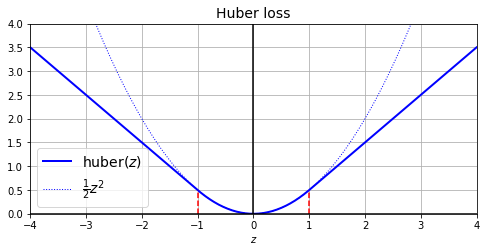

Epoch 1/2
363/363 - 6s - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866 - 6s/epoch - 15ms/step
Epoch 2/2
363/363 - 2s - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281 - 2s/epoch - 5ms/step
----------------------------------------
121/121 - 0s - loss: 0.2382 - mae: 0.5281 - 294ms/epoch - 2ms/step
[test loss, test accuracy]: [0.2382367104291916, 0.5281380414962769]
----------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Implement a Huber loss function from scratch, even though it is
# built-in as tf.keras.losses.Huber. Our function will be slow, 
# since it is not a vectorized implementation.

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)
    
    
def listing4_4():

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
        
    input_shape = X_train.shape[1:]

    
    plt.figure(figsize=(8, 3.5))
    z = np.linspace(-4, 4, 200)
    plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
    plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
    plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
    plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
    plt.gca().axhline(y=0, color='k')
    plt.gca().axvline(x=0, color='k')
    plt.axis([-4, 4, 0, 4])
    plt.grid(True)
    plt.xlabel("$z$")
    plt.legend(fontsize=14)
    plt.title("Huber loss", fontsize=14)
    plt.show()
    
    
    model = keras.models.Sequential([
        keras.layers.Dense(
            30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
        keras.layers.Dense(1),
    ])

    model.compile(
        loss=huber_fn, 
        optimizer="nadam", 
        metrics=["mae"]
    )

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid),
        verbose=2
    )
    
    HR()
    
    eval_result = model.evaluate (
        X_valid_scaled,
        y_valid,
        verbose=2
    )
    print("[test loss, test accuracy]:", eval_result)

    HR()
    
    model.summary()
    
    return model

model_calif = listing4_4()

<a id='4.2'></a><a name='4.2'></a>
## 4.2 Saving/Loading Models that Contain Custom Components
<a href="#top">[back to top]</a>

In [62]:
# Save simple MLP model for California data
def listing4_2(model):
    model.save(f"{DATA_ROOT}/my_model_with_a_custom_loss.h5")
    !du -h {DATA_ROOT}/my_model_with_a_custom_loss.h5
    
    model.summary()
    
listing4_2(model_calif)

32K	data_chp12/my_model_with_a_custom_loss.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


---
This model has contains custom objects.
To specify a different threshold from (-1..1),
we create a function that creates a configured loss function

However, when we save this mode, the threshold will not be
saved. This means we have to specify the threshold value 
when loading the model. We use the name "huber_fn", which 
is the name of the function we gave to Keras, not the
name of the function that created it.

In [63]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [64]:
def listing4_2b():    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    model = keras.models.load_model(
        f"{DATA_ROOT}/my_model_with_a_custom_loss.h5",
        custom_objects={"huber_fn": huber_fn}
    )

    model.compile(
        loss=create_huber(2.0), 
        optimizer="nadam", 
        metrics=["mae"]
    )

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid)
    )
    HR()
    
    eval_result = model.evaluate (
        X_valid_scaled,
        y_valid,
        verbose=2
    )
    print("[test loss, test accuracy]:", eval_result)
    HR()
    
    model.save(f"{DATA_ROOT}/my_model_with_a_custom_loss_threshold_2.h5")
    !du -h {DATA_ROOT}/my_model_with_a_custom_loss_threshold_2.h5
    
listing4_2b()

Epoch 1/2
363/363 [==============================] - 4s 8ms/step - loss: 0.2333 - mae: 0.5030 - val_loss: 0.2825 - val_mae: 0.5116
Epoch 2/2
363/363 [==============================] - 3s 7ms/step - loss: 0.2263 - mae: 0.4953 - val_loss: 0.2659 - val_mae: 0.5086
----------------------------------------
121/121 - 0s - loss: 0.2659 - mae: 0.5086 - 293ms/epoch - 2ms/step
[test loss, test accuracy]: [0.26590704917907715, 0.5086389780044556]
----------------------------------------
32K	data_chp12/my_model_with_a_custom_loss_threshold_2.h5


In [65]:
def listing4_2c():
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    model = keras.models.load_model(
        f"{DATA_ROOT}/my_model_with_a_custom_loss_threshold_2.h5",
        custom_objects={"huber_fn": create_huber(2.0)}
    )
    
    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid)
    )
    HR()
    
    eval_result = model.evaluate (
        X_valid_scaled,
        y_valid,
        verbose=2
    )
    print("[test loss, test accuracy]:", eval_result)
    
listing4_2c()

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.2216 - mae: 0.4892 - val_loss: 0.2414 - val_mae: 0.4844
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.2177 - mae: 0.4841 - val_loss: 0.2240 - val_mae: 0.4812
----------------------------------------
121/121 - 0s - loss: 0.2240 - mae: 0.4812 - 382ms/epoch - 3ms/step
[test loss, test accuracy]: [0.22396036982536316, 0.48115274310112]


---
We can solve this problem by creating a subclass of the
keras.losses.Loss class, and then implementing its
get_config() method.

The Keras API currently only specifies how to use subclassing to define layers, models, callbacks, and regularizers. If you build other components (such as losses, metrics, initializers, or constraints) using subclassing, they may not be portable to other Keras implementations. It’s likely that the Keras API will be updated to specify subclassing for all these components as well.

In [66]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [67]:
def listing4_2d():
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)


    model = keras.models.Sequential([
        keras.layers.Dense(
            units=30, 
            activation="selu", 
            kernel_initializer="lecun_normal", 
            input_shape=X_train.shape[1:]
        ),
        keras.layers.Dense(1),
    ])  

    # Use any instance of this class when you compile the model.
    model.compile(
        loss=HuberLoss(2.), 
        optimizer="nadam", 
        metrics=["mae"]
    ) 

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid),
        verbose=2
    )

    HR()
    
    # When you save the model, the threshold will be saved along with it.
    print("Save model: chp12/my_model_with_a_custom_loss_class.h5")
    model.save(f"{DATA_ROOT}/my_model_with_a_custom_loss_class.h5")
    
    HR()
    
    # when you load the model, you just need to map the class name to the class itself.
    print("Load model: chp12/my_model_with_a_custom_loss_class.h5")
    model = keras.models.load_model(
        f"{DATA_ROOT}/my_model_with_a_custom_loss_class.h5",
        custom_objects={"HuberLoss": HuberLoss}
    )
    HR()
    
    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid),
        verbose=2
    )
    
    HR()
    
    print(f"model.loss.threshold: {model.loss.threshold}")
    HR()
    
    print("model.loss.get_config():")
    pp.pprint(model.loss.get_config())
    
listing4_2d()

Epoch 1/2
363/363 - 3s - loss: 0.7095 - mae: 0.8863 - val_loss: 0.3378 - val_mae: 0.5485 - 3s/epoch - 9ms/step
Epoch 2/2
363/363 - 2s - loss: 0.2416 - mae: 0.5083 - val_loss: 0.2660 - val_mae: 0.5089 - 2s/epoch - 5ms/step
----------------------------------------
Save model: chp12/my_model_with_a_custom_loss_class.h5
----------------------------------------
Load model: chp12/my_model_with_a_custom_loss_class.h5
----------------------------------------
Epoch 1/2
363/363 - 2s - loss: 0.2286 - mae: 0.4970 - val_loss: 0.2120 - val_mae: 0.4723 - 2s/epoch - 6ms/step
Epoch 2/2
363/363 - 2s - loss: 0.2216 - mae: 0.4904 - val_loss: 0.2045 - val_mae: 0.4725 - 2s/epoch - 5ms/step
----------------------------------------
model.loss.threshold: 2.0
----------------------------------------
model.loss.get_config():
{'name': None, 'reduction': 'auto', 'threshold': 2.0}


<a id='4.3'></a><a name='4.3'></a>
## 4.3 Custom Activation Functions, Initializers, Regularizers, and Constraints
<a href="#top">[back to top]</a>

In [68]:
# custom activation function, equivalent to tf.nn.softplus or keras.activations.softplus)()
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

# custom Glorot initializer, equivalent to keras.initializers.glorot_normal()
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

# custom l1 regularizer, equivalent to keras.regularizers.l1(0.01)
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

# custom constraint that ensures weights are all positive,
# equivalent to keras.constraints.nonneg() or tf.nn.relu()
def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [69]:
def listing4_3():
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    # Use the custom functions on a single layer
    layer = keras.layers.Dense(
        1, 
        activation=my_softplus,
        kernel_initializer=my_glorot_initializer,
        kernel_regularizer=my_l1_regularizer,
        kernel_constraint=my_positive_weights,
        name="custom_functions_layer"
    )

    pp.pprint(layer.get_config())
    
listing4_3()

{   'activation': 'my_softplus',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': 'my_positive_weights',
    'kernel_initializer': 'my_glorot_initializer',
    'kernel_regularizer': 'my_l1_regularizer',
    'name': 'custom_functions_layer',
    'trainable': True,
    'units': 1,
    'use_bias': True}


In [70]:
def listing4_3b():

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    model = keras.models.Sequential([
        keras.layers.Dense(
            30, activation="selu", 
            kernel_initializer="lecun_normal",
            input_shape=X_train.shape[1:]
        ),
        keras.layers.Dense(
            1, 
            activation=my_softplus,
            kernel_regularizer=my_l1_regularizer,
            kernel_constraint=my_positive_weights,
            kernel_initializer=my_glorot_initializer
        ),

    ])

    model.summary()

    model.compile(
        loss="mse", 
        optimizer="nadam", 
        metrics=["mae"]
    )

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid)
    )
    HR()
    
    print("Save: chp12/my_model_with_many_custom_parts.h5")
    model.save(f"{DATA_ROOT}/my_model_with_many_custom_parts.h5")
    !du -h {DATA_ROOT}/my_model_with_many_custom_parts.h5

    HR()
    
    print("Load: chp12/my_model_with_many_custom_parts.h5")
    model = keras.models.load_model(
        f"{DATA_ROOT}/my_model_with_many_custom_parts.h5",
        custom_objects={
           "my_l1_regularizer": my_l1_regularizer,
           "my_positive_weights": my_positive_weights,
           "my_glorot_initializer": my_glorot_initializer,
           "my_softplus": my_softplus,
        })

listing4_3b()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
363/363 [==============================] - 4s 7ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 2s 7ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137
----------------------------------------
Save: chp12/my_model_with_many_custom_parts.h5
32K	data_chp12/my_model_with_many_custom_parts.h5
----------------------------------------
Load: chp12/m

---
If a function has hyperparameters that need to be saved along with the model, then you will want to subclass the appropriate class, such as keras.regularizers.Regularizer.

In [71]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}
        
        
def listing4_3c():

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    
    model = keras.models.Sequential([
        keras.layers.Dense(
            30, 
            activation="selu", 
            kernel_initializer="lecun_normal",
            input_shape=X_train.shape[1:]
        ),
        keras.layers.Dense(
            1, 
            activation=my_softplus,
            kernel_regularizer=MyL1Regularizer(0.01),
            kernel_constraint=my_positive_weights,
            kernel_initializer=my_glorot_initializer),
    ])

    model.compile(
        loss="mse", 
        optimizer="nadam", 
        metrics=["mae"]
    )

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid)
    )
    HR()
    
    print("Save: chp12/my_model_with_many_custom_parts.h5")
    model.save(f"{DATA_ROOT}/my_model_with_many_custom_parts.h5")
    !du -h {DATA_ROOT}/my_model_with_many_custom_parts.h5

    HR()
    
    print("Load: chp12/my_model_with_many_custom_parts.h5")
    model = keras.models.load_model(
        f"{DATA_ROOT}/my_model_with_many_custom_parts.h5",
        custom_objects={
           "MyL1Regularizer": MyL1Regularizer,
           "my_positive_weights": my_positive_weights,
           "my_glorot_initializer": my_glorot_initializer,
           "my_softplus": my_softplus,
        })

    model.summary()

listing4_3c()

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137
----------------------------------------
Save: chp12/my_model_with_many_custom_parts.h5
32K	data_chp12/my_model_with_many_custom_parts.h5
----------------------------------------
Load: chp12/my_model_with_many_custom_parts.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
________________________________

<a id='4.4'></a><a name='4.4'></a>
## 4.4 Custom Metrics
<a href="#top">[back to top]</a>

Losses and metrics are conceptually not the same thing: losses (e.g., cross entropy) are used by Gradient Descent to train a model, so they must be differentiable (at least where they are evaluated), and their gradients should not be 0 everywhere. Plus, it’s OK if they are not easily interpretable by humans. 

In contrast, metrics (e.g., accuracy) are used to evaluate a model: they must be more easily interpretable, and they can be non-differentiable or have 0 gradients everywhere.

In [72]:
def listing4_4():
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
        
    input_shape = X_train.shape[1:]
        
    model = keras.models.Sequential([
        keras.layers.Dense(
            30, 
            activation="selu", 
            kernel_initializer="lecun_normal", 
            input_shape=input_shape
        ),
        keras.layers.Dense(1),
    ])

    model.compile(
        loss="mse", 
        optimizer="nadam", 
        # custom metric function
        metrics=[create_huber(2.0)]
    )

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs = 1,
        verbose = 2
    )
    HR()
    
    model.summary()
        
    # Cleaner version of model.get_config()
    for x in model.get_config()['layers']:
        pp.pprint(x)
        
listing4_4()

363/363 - 1s - loss: 2.0982 - huber_fn: 0.9192 - 1s/epoch - 4ms/step
----------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
{   'class_name': 'InputLayer',
    'config': {   'batch_input_shape': (None, 8),
                  'dtype': 'float32',
                  'name': 'dense_input',
                  'ragged': False,
                  'sparse': False}}
{   'class_name': 'Dense',
    'config': {   'activation': 'selu',
                  'activity_regularizer': Non

---
**Note**: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:
* the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the _batch size_ (not the sum of weights, so the batch loss is _not_ the weighted mean of the losses).
* the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

---

sample_weights functionality adds more importance to some samples 
than others during training.so that the loss function used by the 
model is weighted per-sample not per class. It changes the way the 
loss is calculated.

https://androidkt.com/set-sample-weight-in-keras/

A “sample weights” array is an array of numbers that specify how 
much weight each sample in a batch should have in computing the 
total loss. 

len(y_train): 11610
----------------------------------------
                  0
count  11610.000000
mean       0.496247
std        0.287536
min        0.000012
25%        0.248310
50%        0.494810
75%        0.743298
max        0.999718
----------------------------------------
Epoch 1/2
363/363 - 1s - loss: 0.4455 - huber_fn: 0.8931 - 1s/epoch - 4ms/step
Epoch 2/2
363/363 - 1s - loss: 0.1305 - huber_fn: 0.2662 - 859ms/epoch - 2ms/step
----------------------------------------
dict_keys(['loss', 'huber_fn'])
----------------------------------------
0.44554364681243896 0.4432061472773172
----------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
             

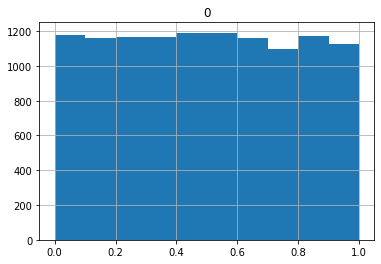

In [73]:
def listing4_4b():
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
        
    input_shape = X_train.shape[1:]
    
    model = keras.models.Sequential([
        keras.layers.Dense(
            30, 
            activation="selu", 
            kernel_initializer="lecun_normal", 
            input_shape=input_shape
        ),
        keras.layers.Dense(1),
    ])

    # Use the same function as the loss and a metric.
    model.compile(
        loss=create_huber(2.0), 
        optimizer="nadam", 
        metrics=[create_huber(2.0)]
    )
    
    
    sample_weight = np.random.rand(len(y_train))
    print(f"len(y_train): {len(y_train)}")
    HR()
    

    df = pd.DataFrame(sample_weight)
    df.hist(legend=False, grid=True)
    print(df.describe())
    HR()
    

    history = model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2, 
        sample_weight=sample_weight,
        verbose=2
    )
    HR()
    
    print(history.history.keys())
    HR()
    

    # Show results for first epoch only
    print(
        history.history["loss"][0], 
        history.history["huber_fn"][0] * sample_weight.mean()
    )
    
    HR()
    
    model.summary()
        
listing4_4b()

<a id='4.5'></a><a name='4.5'></a>
## 4.5 Streaming Metrics
<a href="#top">[back to top]</a>

precision is the number of true positives divided by the number of positive predictions (including both true positives and false positives)

This is an object that can keep track of the number of true positives and the number of false positives and that can compute their ratio when requested. This is precisely what the `keras.metrics.Precision` class does:

https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision

In [74]:
# Standalone usage
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [75]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [76]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [77]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [78]:
precision.reset_states()

In [79]:
def listing3_5_compile_api():
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="selu", input_shape=[8]),
        keras.layers.Dense(1),
    ])
    
    model.compile(
        optimizer='sgd',
        loss='mse',
        # Usage with compile() API:
        metrics=[tf.keras.metrics.Precision()]
    )

    for x in model.get_config()['layers']:
        pp.pprint(x)
    
listing3_5_compile_api()

{   'class_name': 'InputLayer',
    'config': {   'batch_input_shape': (None, 8),
                  'dtype': 'float32',
                  'name': 'dense_2_input',
                  'ragged': False,
                  'sparse': False}}
{   'class_name': 'Dense',
    'config': {   'activation': 'selu',
                  'activity_regularizer': None,
                  'batch_input_shape': (None, 8),
                  'bias_constraint': None,
                  'bias_initializer': {'class_name': 'Zeros', 'config': {}},
                  'bias_regularizer': None,
                  'dtype': 'float32',
                  'kernel_constraint': None,
                  'kernel_initializer': {   'class_name': 'GlorotUniform',
                                            'config': {'seed': None}},
                  'kernel_regularizer': None,
                  'name': 'dense_2',
                  'trainable': True,
                  'units': 30,
                  'use_bias': True}}
{   'class_name': 'D

Creating a streaming metric:

In [80]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [81]:
# Creating a streaming metric by creating a subclass of keras.metrics.Metric class.
def listing4_5():
    
    m = HuberMetric(2.)

    # total = 2 * |10 - 2| - 2²/2 = 14
    # count = 1
    # result = 14 / 1 = 14
    m(tf.constant([[2.]]), tf.constant([[10.]])) 


    # total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
    # count = count + 2 = 3
    # result = total / count = 21 / 3 = 7
    m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

    print("m.result():")
    print(m.result())
    HR()
    
    print("m.variables:")
    print(m.variables)
    HR()
    
    m.reset_states()
    print("Reset via m.reset_states()\n")    
    print("m.variables:")
    print(m.variables)

listing4_5()

m.result():
tf.Tensor(7.0, shape=(), dtype=float32)
----------------------------------------
m.variables:
[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>, <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]
----------------------------------------
Reset via m.reset_states()

m.variables:
[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]


In [82]:
# Creating a streaming metric by creating a subclass of keras.metrics.Metric class.
def listing4_5b():
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]
        
    # Let's check that the HuberMetric class works:
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = keras.models.Sequential([
        keras.layers.Dense(
            units=30, 
            activation="selu", 
            kernel_initializer="lecun_normal", 
            input_shape=input_shape
        ),
        keras.layers.Dense(1),
    ])

    model.compile(
        loss=create_huber(2.0), 
        optimizer="nadam", 
        metrics=[HuberMetric(2.0)]
    )

    model.fit(
        X_train_scaled.astype(np.float32), 
        y_train.astype(np.float32), 
        epochs=2,
        verbose=2
    )
    HR()
    
    print("Saving model: chp12/my_model_with_a_custom_metric.h5")
    model.save(f"{DATA_ROOT}/my_model_with_a_custom_metric.h5")
    !du -h {DATA_ROOT}/my_model_with_a_custom_metric.h5

listing4_5b()

Epoch 1/2
363/363 - 1s - loss: 0.8707 - huber_metric: 0.8707 - 1s/epoch - 4ms/step
Epoch 2/2
363/363 - 1s - loss: 0.2595 - huber_metric: 0.2595 - 810ms/epoch - 2ms/step
----------------------------------------
Saving model: chp12/my_model_with_a_custom_metric.h5
32K	data_chp12/my_model_with_a_custom_metric.h5


In [83]:
def listing4_5c():
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]
        
    model = keras.models.load_model(
        f"{DATA_ROOT}/my_model_with_a_custom_metric.h5",
        custom_objects={
            "huber_fn": create_huber(2.0),
            "HuberMetric": HuberMetric
        }
    )

    model.fit(
        X_train_scaled.astype(np.float32), 
        y_train.astype(np.float32), 
        epochs=2,
        verbose=2
    )
    HR()
    
    # Warning: In TF 2.2, tf.keras adds an extra first metric in 
    # model.metrics at position 0 (see TF issue #38150). This forces 
    # us to use model.metrics[-1] rather than model.metrics[0] to 
    # access the HuberMetric.
    print(f"tf.__version__: {tf.__version__}")
    HR()
    print(model.metrics[-1].threshold)
    
listing4_5c()

Epoch 1/2
363/363 - 1s - loss: 0.2350 - huber_metric: 0.2350 - 1s/epoch - 3ms/step
Epoch 2/2
363/363 - 1s - loss: 0.2278 - huber_metric: 0.2278 - 1s/epoch - 3ms/step
----------------------------------------
tf.__version__: 2.8.2
----------------------------------------
2.0


Looks like it works fine! More simply, we could have created the class like this:

In [84]:
def listing4_5d():
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]

    
    # This class handles shapes better, and it also supports sample weights.
    class HuberMetric(keras.metrics.Mean):
        def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
            self.threshold = threshold
            self.huber_fn = create_huber(threshold)
            super().__init__(name=name, dtype=dtype)
        def update_state(self, y_true, y_pred, sample_weight=None):
            metric = self.huber_fn(y_true, y_pred)
            super(HuberMetric, self).update_state(metric, sample_weight)
        def get_config(self):
            base_config = super().get_config()
            return {**base_config, "threshold": self.threshold} 

    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                           input_shape=input_shape),
        keras.layers.Dense(1),
    ])

    model.compile(
        loss=keras.losses.Huber(2.0), 
        optimizer="nadam", 
        weighted_metrics=[HuberMetric(2.0)]
    )

    sample_weight = np.random.rand(len(y_train))

    history = model.fit(
        X_train_scaled.astype(np.float32), 
        y_train.astype(np.float32),
        epochs=2, 
        sample_weight=sample_weight,
        verbose=2
    )

    print(
        history.history["loss"][0], 
        history.history["HuberMetric"][0] * sample_weight.mean()
    )
    
    print("Save model: chp12/my_model_with_a_custom_metric_v2.h5")
    model.save(f"{DATA_ROOT}/my_model_with_a_custom_metric_v2.h5")

    
    print("Load model: chp12/my_model_with_a_custom_metric_v2.h5")
    model = keras.models.load_model(
        f"{DATA_ROOT}/my_model_with_a_custom_metric_v2.h5",
        custom_objects={"HuberMetric": HuberMetric}
    )

    model.fit(
        X_train_scaled.astype(np.float32), 
        y_train.astype(np.float32), 
        epochs=2,
        verbose=2
    )
    HR()
    
    print(model.metrics[-1].threshold)

listing4_5d()

Epoch 1/2
363/363 - 2s - loss: 0.4455 - HuberMetric: 0.8978 - 2s/epoch - 5ms/step
Epoch 2/2
363/363 - 1s - loss: 0.1305 - HuberMetric: 0.2631 - 1s/epoch - 3ms/step
0.44554364681243896 0.44554368685750223
Save model: chp12/my_model_with_a_custom_metric_v2.h5
Load model: chp12/my_model_with_a_custom_metric_v2.h5
Epoch 1/2
363/363 - 2s - loss: 0.2377 - HuberMetric: 0.2377 - 2s/epoch - 4ms/step
Epoch 2/2
363/363 - 1s - loss: 0.2279 - HuberMetric: 0.2279 - 923ms/epoch - 3ms/step
----------------------------------------
2.0


<a id='4.6'></a><a name='4.6'></a>
## 4.6 Custom Layers
<a href="#top">[back to top]</a>

<a id='4.6.1'></a><a name='4.6.1'></a>
### 4.6.1 Custom Layers: Layers with no weights
<a href="#top">[back to top]</a>

Some layers have no weights, such as `keras.layers.Flatten` or `keras.layers.ReLU`. If you want to create a custom layer without any weights, the simplest option is to write a function and wrap it in a `keras.layers.Lambda` layer. For example, the following layer will apply the exponential function to its inputs:

In [85]:
def listing4_6_1():
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 
    
    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]
    
    
    exponential_layer = keras.layers.Lambda(
        lambda x: tf.exp(x)
    )
    
    print(exponential_layer([-1., 0., 1.]))
    HR()
    
    pp.pprint(exponential_layer.get_config())
    HR()
    
    
    # Adding an exponential layer at the output of a 
    # regression model can be useful if the values to 
    # predict are positive and with very different 
    # scales (e.g., 0.001, 10., 10000):
    
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=input_shape),
        keras.layers.Dense(1),
        exponential_layer
    ])
    model.compile(loss="mse", optimizer="sgd")

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=5,
        validation_data=(X_valid_scaled, y_valid),
        verbose=2
    )
    HR()
    
    eval_result = model.evaluate(
        X_test_scaled, 
        y_test,
        verbose=2
    )
    HR()
    
    print("[test loss, test accuracy]:", eval_result)
    HR()
    
listing4_6_1()

tf.Tensor([0.36787948 1.         2.7182817 ], shape=(3,), dtype=float32)
----------------------------------------
{   'arguments': {},
    'dtype': 'float32',
    'function': (   '4wEAAAAAAAAAAQAAAAMAAABTAAAAcwoAAAB0AKABfAChAVMAKQFOKQLaAnRm2gNleHApAdoBeKkA\n'
                    'cgQAAAD6HzxpcHl0aG9uLWlucHV0LTg1LWY3M2NkNjdkNTkyNT7aCDxsYW1iZGE+IQAAAPMAAAAA\n',
                    None,
                    None),
    'function_type': 'lambda',
    'module': '__main__',
    'name': 'lambda',
    'output_shape': None,
    'output_shape_module': None,
    'output_shape_type': 'raw',
    'trainable': True}
----------------------------------------
Epoch 1/5
363/363 - 1s - loss: 1.0631 - val_loss: 0.4457 - 1s/epoch - 3ms/step
Epoch 2/5
363/363 - 1s - loss: 0.4562 - val_loss: 0.3798 - 954ms/epoch - 3ms/step
Epoch 3/5
363/363 - 1s - loss: 0.4029 - val_loss: 0.3548 - 828ms/epoch - 2ms/step
Epoch 4/5
363/363 - 1s - loss: 0.3851 - val_loss: 0.3464 - 790ms/epoch - 2ms/step
Epoch 5/5
363/363 - 1s - l

<a id='4.6.2'></a><a name='4.6.2'></a>
### 4.6.2 Custom Layers: Layers containing weights
<a href="#top">[back to top]</a>

To build a custom stateful layer (i.e., a layer with weights), you need to create a subclass of the `keras.layers.Layer` class. For example, the following class implements a simplified version of the layer:

In [86]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config, 
            "units": self.units,
            "activation": keras.activations.serialize(self.activation)
        }

In [87]:
def listing4_6_2():
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 
    
    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]
        
    model = keras.models.Sequential([
        MyDense(30, activation="relu", input_shape=input_shape),
        MyDense(1)
    ])

    model.compile(loss="mse", optimizer="nadam")
    
    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid),
        verbose=2
    )
    HR()
    
    model.evaluate(X_test_scaled, y_test, verbose=2)

    print("Save: chp12/my_model_with_a_custom_layer.h5")
    model.save(f"{DATA_ROOT}/my_model_with_a_custom_layer.h5")
    
    HR()
    
    print("Load: chp12/my_model_with_a_custom_layer.h5")
    model = keras.models.load_model(
        f"{DATA_ROOT}/my_model_with_a_custom_layer.h5",
        custom_objects={"MyDense": MyDense}
    )

    model.summary()

listing4_6_2()

Epoch 1/2
363/363 - 2s - loss: 2.2563 - val_loss: 0.9472 - 2s/epoch - 5ms/step
Epoch 2/2
363/363 - 1s - loss: 0.6485 - val_loss: 0.6219 - 1s/epoch - 3ms/step
----------------------------------------
162/162 - 0s - loss: 0.5474 - 236ms/epoch - 1ms/step
Save: chp12/my_model_with_a_custom_layer.h5
----------------------------------------
Load: chp12/my_model_with_a_custom_layer.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense (MyDense)          (None, 30)                270       
                                                                 
 my_dense_1 (MyDense)        (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


<a id='4.6.3'></a><a name='4.6.3'></a>
### 4.6.3 Custom Layers: Layer with multiple inputs
<a href="#top">[back to top]</a>

In [88]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # Debugging of custom layer
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [89]:
# Our custom layer can be called using the functional API like this:

# Note that the call() method receives symbolic inputs, 
# whose shape is only partially specified (at this stage, 
# we don't know the batch size, which is why the first dimension 
# is None)

def listing4_6_3_test1():
    inputs1 = keras.layers.Input(shape=[2])
    inputs2 = keras.layers.Input(shape=[2])
    outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

listing4_6_3_test1()

X1.shape:  (None, 2)  X2.shape:  (None, 2)


In [90]:
# We can also pass actual data to the custom layer. 
# To test this, let's split each dataset's inputs into two parts, 
# with four features each:
def split_data(data):
    columns_count = data.shape[-1]
    half = columns_count // 2
    return data[:, :half], data[:, half:]

In [91]:
def listing4_6_3_test2():

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 
    
    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]
        
    X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
    X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
    X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

    # Printing the splitted data shapes
    print(X_train_scaled_A.shape, X_train_scaled_B.shape)
    HR()
    
    # Now notice that the shapes are fully specified:
    outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))
    print(outputs1)
    HR()
    
    print(outputs2)
    
listing4_6_3_test2()

(11610, 4) (11610, 4)
----------------------------------------
X1.shape:  (11610, 4)  X2.shape:  (11610, 4)
tf.Tensor(
[[-0.17324547 -1.6507294  -0.01412493 -1.4073021 ]
 [ 2.6134481  -1.6637297  -0.5110694   0.86339283]
 [-0.5025582  -0.27013135  2.1268167  -0.6402433 ]
 ...
 [-0.7709261   0.6388412  -1.2357894   1.4055338 ]
 [-0.9933209   1.8356445   0.41289914 -0.16435926]
 [ 0.7240328   0.00968345  1.4208122  -1.4639156 ]], shape=(11610, 4), dtype=float32)
----------------------------------------
tf.Tensor(
[[-0.00402183  0.61749667 -0.8766508  -0.02112347]
 [ 1.3997903  -0.38343248 -0.37163973 -0.2558276 ]
 [ 0.03643769 -0.00890543  1.0706553  -1.7933904 ]
 ...
 [-0.5534281   0.0678305   0.371412    0.29685235]
 [ 0.05403009 -0.02504723 -0.0567511   0.0063295 ]
 [-0.15393297 -0.03349337  0.3358127   0.2048483 ]], shape=(11610, 4), dtype=float32)


Let's build a more complete model using the functional API (this is just a toy example, don't expect awesome performance):

In [92]:
# Build a more complete model using the functional API. This is just a toy example.

def listing4_6_3():
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 
    
    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]
    
    X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
    X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
    X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

    
    input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1])
    input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1])
    hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
    hidden_A = keras.layers.Dense(30, activation='selu')(hidden_A)
    hidden_B = keras.layers.Dense(30, activation='selu')(hidden_B)
    concat = keras.layers.Concatenate()((hidden_A, hidden_B))
    output = keras.layers.Dense(1)(concat)
    model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

    model.compile(loss='mse', optimizer='nadam')

    HR()
    
    print("Fit the model:")
    hist = model.fit(
        (X_train_scaled_A, X_train_scaled_B), 
        y_train, epochs=2,
        validation_data=((X_valid_scaled_A, X_valid_scaled_B), y_valid),
        verbose=2
    )
    HR()
    
    print(hist.history.keys())
    HR()
    
    print("Evaluate the model:")
    eval_result = model.evaluate(
        (X_valid_scaled_A, X_valid_scaled_B), 
        y_valid,
        verbose=2
    )
    HR()
    
    print("[test loss, test accuracy]:", eval_result)
    HR()
    
listing4_6_3()

X1.shape:  (None, 4)  X2.shape:  (None, 4)
----------------------------------------
Fit the model:
Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 - 2s - loss: 2.1142 - val_loss: 1.3630 - 2s/epoch - 6ms/step
Epoch 2/2
363/363 - 1s - loss: 0.9684 - val_loss: 0.9773 - 1s/epoch - 3ms/step
----------------------------------------
dict_keys(['loss', 'val_loss'])
----------------------------------------
Evaluate the model:
121/121 - 0s - loss: 0.9773 - 204ms/epoch - 2ms/step
----------------------------------------
[test loss, test accuracy]: 0.9772732853889465
----------------------------------------


In [93]:
# Now let's create a layer with a different behavior during training and testing:
# This is called 'MyGaussianNoise' in the book

class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

Here's a simple model that uses this custom layer:

In [94]:
# Here's a simple model that uses this custom layer:
def listing4_6_3b():

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 
    
    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]
    
    X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
    X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
    X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

    model = keras.models.Sequential([
        AddGaussianNoise(stddev=1.0),
        keras.layers.Dense(30, activation="selu"),
        keras.layers.Dense(1)
    ])

    model.compile(
        loss="mse", 
        optimizer="nadam",
        metrics=['accuracy']
    )

    hist = model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid),
        verbose=2
    )
    HR()
    
    print(hist.history.keys())
    HR()
        
    # Try to always use return_dict=True, so we can get a 
    # clearer specification of what's returned.
    eval_result = model.evaluate(
        X_test_scaled, 
        y_test,
        verbose=2,
        return_dict=True
    )
    HR()
    
    print(f"eval result (loss): {eval_result['loss']}")
    print(f"eval result (accuraacy): {eval_result['accuracy']}")
    
listing4_6_3b()

Epoch 1/2
363/363 - 2s - loss: 2.3857 - accuracy: 0.0022 - val_loss: 7.6082 - val_accuracy: 0.0044 - 2s/epoch - 6ms/step
Epoch 2/2
363/363 - 1s - loss: 1.0571 - accuracy: 0.0029 - val_loss: 4.4597 - val_accuracy: 0.0044 - 1s/epoch - 3ms/step
----------------------------------------
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
----------------------------------------
162/162 - 0s - loss: 0.7560 - accuracy: 0.0021 - 252ms/epoch - 2ms/step
----------------------------------------
eval result (loss): 0.7559615969657898
eval result (accuraacy): 0.0021317829377949238


<a id='4.7'></a><a name='4.7'></a>
## 4.7 Custom Models
<a href="#top">[back to top]</a>

Creating custom model classes is straightforward: subclass the
class, create layers and variables in the constructor. Then 
implement the method to do whatever you want the model to do.

In [95]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [
            keras.layers.Dense(n_neurons, activation="elu", kernel_initializer="he_normal")
            for _ in range(n_layers)
        ]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z


# Use Subclassing API to define model
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [96]:
def listing4_7():

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    input_shape = X_train.shape[1:]

    X_new_scaled = X_test_scaled

    model = ResidualRegressor(1)

    model.compile(
        loss="mse", 
        optimizer="nadam",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train_scaled, 
        y_train, 
        epochs=5,
        verbose=2
    )
    HR()
    
    eval_result = model.evaluate(
        X_test_scaled, 
        y_test,
        verbose=2,
        return_dict=True,
    )
    HR()
        
    print(f"eval result (loss): {eval_result['loss']}")
    print(f"eval result (accuraacy): {eval_result['accuracy']}")
    
    HR()
    
    y_pred = model.predict(X_new_scaled)

    print("Save model: chp12/my_custom_model.ckpt")
    model.save(f"{DATA_ROOT}/my_custom_model.ckpt")
    
    HR()
    
    print("Load model: chp12/my_custom_model.ckpt")
    model = keras.models.load_model(f"{DATA_ROOT}/my_custom_model.ckpt")

    history = model.fit(
        X_train_scaled, 
        y_train, 
        epochs=5,
        verbose=2
    )
    HR()
    print(history.history.keys())
    
    HR()
    model.summary()
    
listing4_7()

Epoch 1/5
363/363 - 3s - loss: 9.1325 - accuracy: 0.0020 - 3s/epoch - 8ms/step
Epoch 2/5
363/363 - 2s - loss: 1.0578 - accuracy: 0.0026 - 2s/epoch - 4ms/step
Epoch 3/5
363/363 - 1s - loss: 0.8869 - accuracy: 0.0026 - 1s/epoch - 4ms/step
Epoch 4/5
363/363 - 3s - loss: 0.5831 - accuracy: 0.0026 - 3s/epoch - 7ms/step
Epoch 5/5
363/363 - 3s - loss: 0.6463 - accuracy: 0.0025 - 3s/epoch - 7ms/step
----------------------------------------
162/162 - 1s - loss: 0.6513 - accuracy: 0.0019 - 786ms/epoch - 5ms/step
----------------------------------------
eval result (loss): 0.6512573957443237
eval result (accuraacy): 0.0019379844889044762
----------------------------------------
Save model: chp12/my_custom_model.ckpt


INFO:tensorflow:Assets written to: data_chp12/my_custom_model.ckpt/assets


INFO:tensorflow:Assets written to: data_chp12/my_custom_model.ckpt/assets


----------------------------------------
Load model: chp12/my_custom_model.ckpt
Epoch 1/5
363/363 - 3s - loss: 0.8017 - accuracy: 0.0027 - 3s/epoch - 7ms/step
Epoch 2/5
363/363 - 2s - loss: 0.5028 - accuracy: 0.0028 - 2s/epoch - 4ms/step
Epoch 3/5
363/363 - 2s - loss: 0.5362 - accuracy: 0.0027 - 2s/epoch - 4ms/step
Epoch 4/5
363/363 - 2s - loss: 0.4120 - accuracy: 0.0028 - 2s/epoch - 4ms/step
Epoch 5/5
363/363 - 2s - loss: 0.5718 - accuracy: 0.0028 - 2s/epoch - 4ms/step
----------------------------------------
dict_keys(['loss', 'accuracy'])
----------------------------------------
Model: "residual_regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  270       
                                                                 
 residual_block (ResidualBlo  multiple                 1860      
 ck)                                                 

In [97]:
def listing4_7b():
# We could have defined the model using the sequential API instead:

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    input_shape = X_train.shape[1:]

    X_new_scaled = X_test_scaled
    
    block1 = ResidualBlock(2, 30)
    
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
        block1, 
        block1, 
        block1, 
        block1,
        ResidualBlock(2, 30),
        keras.layers.Dense(1)
    ])

    model.compile(
        loss="mse", 
        optimizer="nadam",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train_scaled, 
        y_train, 
        epochs=5,
        verbose=2
    )
    HR()
    
    eval_result = model.evaluate(
        X_test_scaled, 
        y_test,
        verbose=2,
        return_dict=True
    )
    HR()
    
    print(f"eval result (loss): {eval_result['loss']}")
    print(f"eval result (accuraacy): {eval_result['accuracy']}")
        
    HR()
    
    y_pred = model.predict(X_new_scaled)
    print(f"y_pred: {y_pred}")
    
    HR()
    model.summary()

    print("Save model: chp12/my_custom_model_sequential.ckpt")
    model.save(f"{DATA_ROOT}/my_custom_model.ckpt")
    
    HR()
    
    print("Start new...")
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 
    
    print("Load model: chp12/my_custom_model_sequential.ckpt")
    model = keras.models.load_model(f"{DATA_ROOT}/my_custom_model.ckpt")
    
    
    # Do we really to refit this model? Most likely not!
    
    # history = model.fit(
    #     X_train_scaled, 
    #     y_train, 
    #     epochs=5,
    #     verbose=2
    # )
    # HR()
    # print(history.history.keys())
    
    
    y_pred = model.predict(X_new_scaled)
    print(f"y_pred: {y_pred}")
        
listing4_7b()

Epoch 1/5
363/363 - 3s - loss: 0.8695 - accuracy: 0.0025 - 3s/epoch - 9ms/step
Epoch 2/5
363/363 - 1s - loss: 0.4720 - accuracy: 0.0028 - 1s/epoch - 4ms/step
Epoch 3/5
363/363 - 1s - loss: 0.5537 - accuracy: 0.0028 - 1s/epoch - 4ms/step
Epoch 4/5
363/363 - 1s - loss: 0.3809 - accuracy: 0.0028 - 1s/epoch - 4ms/step
Epoch 5/5
363/363 - 1s - loss: 0.4012 - accuracy: 0.0028 - 1s/epoch - 4ms/step
----------------------------------------
162/162 - 0s - loss: 0.4852 - accuracy: 0.0021 - 363ms/epoch - 2ms/step
----------------------------------------
eval result (loss): 0.4851548671722412
eval result (accuraacy): 0.0021317829377949238
----------------------------------------
y_pred: [[0.49208224]
 [1.7723728 ]
 [4.461338  ]
 ...
 [1.6717831 ]
 [2.3763793 ]
 [4.5635967 ]]
----------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (Non

INFO:tensorflow:Assets written to: data_chp12/my_custom_model.ckpt/assets


INFO:tensorflow:Assets written to: data_chp12/my_custom_model.ckpt/assets


----------------------------------------
Start new...
Load model: chp12/my_custom_model_sequential.ckpt
y_pred: [[0.49208224]
 [1.7723728 ]
 [4.461338  ]
 ...
 [1.6717831 ]
 [2.3763793 ]
 [4.5635967 ]]


<a id='4.8'></a><a name='4.8'></a>
## 4.8 Losses and Metrics Based on Model Internals
<a href="#top">[back to top]</a>

**Note**: 

The following code has two differences with the code in the book:
1. It creates a `keras.metrics.Mean()` metric in the constructor and uses it in the `call()` method to track the mean reconstruction loss. Since we only want to do this during training, we add a `training` argument to the `call()` method, and if `training` is `True`, then we update `reconstruction_mean` and we call `self.add_metric()` to ensure it's displayed properly.
2. Due to an issue introduced in TF 2.2 ([#46858](https://github.com/tensorflow/tensorflow/issues/46858)), we must not call `super().build()` inside the `build()` method.

---

The custom losses and metrics we defined earlier were all based on the labels and the predictions (and optionally sample weights). There will be times when you want to define losses based on other parts of your model, such as the weights or activations of its hidden layers. This may be useful for regularization purposes or to monitor some internal aspect of your model.

To define a custom loss based on model internals, compute it based on any part of the model you want, then pass the result to the `add_loss()` method.


In [98]:
# Custom model with a custom reconstruction loss
class ReconstructingRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        #super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

In [99]:
def listing4_8():

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    input_shape = X_train.shape[1:]
    
    model = ReconstructingRegressor(1)

    model.compile(
        loss="mse", 
        optimizer="nadam",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        verbose=2
    )
    HR()
    
    print(history.history.keys())
    
    eval_result = model.evaluate(
        X_valid_scaled, 
        y_valid,
        verbose=2,
        return_dict=True
    )
    HR()
    
    print(f"eval result (loss): {eval_result['loss']}")
    print(f"eval result (accuraacy): {eval_result['accuracy']}")
        
    HR()
    
    y_pred = model.predict(X_test_scaled)
    print(f"y_pred: {y_pred}")

listing4_8()

Epoch 1/2
363/363 - 3s - loss: 0.7886 - accuracy: 0.0029 - reconstruction_error: 1.0473 - 3s/epoch - 8ms/step
Epoch 2/2
363/363 - 2s - loss: 0.4134 - accuracy: 0.0029 - reconstruction_error: 0.4013 - 2s/epoch - 4ms/step
----------------------------------------
dict_keys(['loss', 'accuracy', 'reconstruction_error'])
121/121 - 0s - loss: 1.0159 - accuracy: 0.0044 - reconstruction_error: 0.0000e+00 - 337ms/epoch - 3ms/step
----------------------------------------
eval result (loss): 1.0159374475479126
eval result (accuraacy): 0.004392764996737242
----------------------------------------
y_pred: [[0.87845206]
 [1.5451547 ]
 [3.9395456 ]
 ...
 [1.4461813 ]
 [2.4412837 ]
 [4.091943  ]]


<a id='4.9'></a><a name='4.9'></a>
## 4.9 Computing Gradients with Autodiff
<a href="#top">[back to top]</a>

No real end-to-end models here, just examples of functionality.

In [100]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [101]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [102]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [103]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [104]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [105]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)

try:
    dz_dw2 = tape.gradient(z, w2)
except Exception as e:
    print(e)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


In [106]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

In [107]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [108]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [109]:
gradients

[None, None]

In [110]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [111]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [112]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [113]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

In [114]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [115]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [116]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [117]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [118]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [119]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [120]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [121]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [122]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [123]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

<a id='4.10'></a><a name='4.10'></a>
## 4.10 Custom Training Loops
<a href="#top">[back to top]</a>

In [124]:
def listing4_10():

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 
    
    l2_reg = keras.regularizers.l2(0.05)
    
    model = keras.models.Sequential([
        keras.layers.Dense(
            30, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2_reg
        ),
        keras.layers.Dense(1, kernel_regularizer=l2_reg)
    ])

    def random_batch(X, y, batch_size=32):
        idx = np.random.randint(len(X), size=batch_size)
        return X[idx], y[idx]

    def print_status_bar(iteration, total, loss, metrics=None):
        metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                             for m in [loss] + (metrics or [])])
        end = "" if iteration < total else "\n"
        print("\r{}/{} - ".format(iteration, total) + metrics,
              end=end)

    import time

    mean_loss = keras.metrics.Mean(name="loss")
    mean_square = keras.metrics.Mean(name="mean_square")
    for i in range(1, 50 + 1):
        loss = 1 / i
        mean_loss(loss)
        mean_square(i ** 2)
        print_status_bar(i, 50, mean_loss, [mean_square])
        time.sleep(0.05)
        
listing4_10()

50/50 - loss: 0.0900 - mean_square: 858.5000


In [125]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [126]:
# A fancier version with a progress bar.
def listing4_10b():

    import time
        
    progress_bar(3500, 10000, size=6)

    mean_loss = keras.metrics.Mean(name="loss")
    mean_square = keras.metrics.Mean(name="mean_square")
    for i in range(1, 50 + 1):
        loss = 1 / i
        mean_loss(loss)
        mean_square(i ** 2)
        print_status_bar(i, 50, mean_loss, [mean_square])
        time.sleep(0.05)

listing4_10b()

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


In [127]:
# Model with a custom-loop
def listing4_10c():

    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    input_shape = X_train.shape[1:]
    
    l2_reg = keras.regularizers.l2(0.05)
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                           kernel_regularizer=l2_reg),
        keras.layers.Dense(1, kernel_regularizer=l2_reg)
    ])
    
    n_epochs = 5
    batch_size = 32
    n_steps = len(X_train) // batch_size
    optimizer = keras.optimizers.Nadam(learning_rate=0.01)
    loss_fn = keras.losses.mean_squared_error
    mean_loss = keras.metrics.Mean()
    metrics = [keras.metrics.MeanAbsoluteError()]

    for epoch in range(1, n_epochs + 1):
        print("Epoch {}/{}".format(epoch, n_epochs))
        for step in range(1, n_steps + 1):
            X_batch, y_batch = random_batch(X_train_scaled, y_train)
            with tf.GradientTape() as tape:
                y_pred = model(X_batch)
                main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                loss = tf.add_n([main_loss] + model.losses)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            for variable in model.variables:
                if variable.constraint is not None:
                    variable.assign(variable.constraint(variable))
            mean_loss(loss)
            for metric in metrics:
                metric(y_batch, y_pred)
            print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
        print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
        for metric in [mean_loss] + metrics:
            metric.reset_states()

    try:
        from tqdm.notebook import trange
        from collections import OrderedDict
        with trange(1, n_epochs + 1, desc="All epochs") as epochs:
            for epoch in epochs:
                with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
                    for step in steps:
                        X_batch, y_batch = random_batch(X_train_scaled, y_train)
                        with tf.GradientTape() as tape:
                            y_pred = model(X_batch)
                            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                            loss = tf.add_n([main_loss] + model.losses)
                        gradients = tape.gradient(loss, model.trainable_variables)
                        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                        for variable in model.variables:
                            if variable.constraint is not None:
                                variable.assign(variable.constraint(variable))                    
                        status = OrderedDict()
                        mean_loss(loss)
                        status["loss"] = mean_loss.result().numpy()
                        for metric in metrics:
                            metric(y_batch, y_pred)
                            status[metric.name] = metric.result().numpy()
                        steps.set_postfix(status)
                for metric in [mean_loss] + metrics:
                    metric.reset_states()
    except ImportError as ex:
        print("To run this cell, please install tqdm, ipywidgets and restart Jupyter")

    model.summary()

listing4_10c()

Epoch 1/5
11610/11610 [==============================] - mean: 1.3955 - mean_absolute_error: 0.5722
Epoch 2/5
11610/11610 [==============================] - mean: 0.6774 - mean_absolute_error: 0.5280
Epoch 3/5
11610/11610 [==============================] - mean: 0.6351 - mean_absolute_error: 0.5177
Epoch 4/5
11610/11610 [==============================] - mean: 0.6384 - mean_absolute_error: 0.5181
Epoch 5/5
11610/11610 [==============================] - mean: 0.6440 - mean_absolute_error: 0.5222


All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/362 [00:00<?, ?it/s]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 30)                  270       
                                                                 
 dense_1 (Dense)             (32, 1)                   31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


---
<a id='5.0'></a><a name='5.0'></a>
# 5. TensorFlow Functions and Graphs
<a href="#top">[back to top]</a>

<a id='5.1'></a><a name='5.1'></a>
## 5.1 TensorFlow Functions 
<a href="#top">[back to top]</a>

Using `tf.function()`

Convert Python function to TensorFlow function via tf.function()

In [128]:
# Python function
def cube(x):
    return x ** 3
    
    
def listing5_1():

    print(f"cube(2): {cube(2)}")
    HR()

    print(f"cube(tf.constant(2.0)): {cube(tf.constant(2.0))}")
    HR()
    
    # Convert to a TensorFlow function
    tf_cube = tf.function(cube)
    
    print("tf_cube (converted to TF Function via tf.function()):")
    print(tf_cube)
    HR()
    
    print(f"tf_cube(2): {tf_cube(2)}")
    HR()
    
    print(f"tf_cube(tf.constant(2.0)): {tf_cube(tf.constant(2.0))}")
    HR()
    
    @tf.function
    def tf_cube_decorated(x):
        return x ** 3
    
    print("tf_cube_decorated (converted to TF Function via @tf.function decorator):")
    print(tf_cube_decorated)
    HR()
    
    print(f"tf_cube_decorated(2): {tf_cube_decorated(2)}")
    HR()
    
    print("View the generated TF Function's source code for tf_cube:\n")
    print(tf.autograph.to_code(tf_cube.python_function))
    
listing5_1()    

cube(2): 8
----------------------------------------
cube(tf.constant(2.0)): 8.0
----------------------------------------
tf_cube (converted to TF Function via tf.function()):
----------------------------------------
tf_cube(2): 8
----------------------------------------
tf_cube(tf.constant(2.0)): 8.0
----------------------------------------
tf_cube_decorated (converted to TF Function via @tf.function decorator):
----------------------------------------
tf_cube_decorated(2): 8
----------------------------------------
View the generated TF Function's source code for tf_cube:

def tf__cube(x):
    with ag__.FunctionScope('cube', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (ag__.ld(x) ** 3)
        except:
            do_return = False
            raise
        ret

<a id='5.2'></a><a name='5.2'></a>
## 5.2 TF Functions and Concrete Functions 
<a href="#top">[back to top]</a>

Using `GenericFunction.get_concrete_function()`

Material from Appendix G. TensorFlow Graphs

Every time a function is traced, a new concrete function is created. You can directly obtain a concrete function, by using `GenericFunction.get_concrete_function()`.

In [129]:
def listing5_2():
    
    # Run only the tracing stage with .get_concrete_function.
    tf_cube = tf.function(cube)
    concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
    
    print(concrete_function)
    HR()
    
    print(concrete_function.graph)
    HR()
    
    print(concrete_function(tf.constant(2.0)))
    HR()

    print(concrete_function is tf_cube.get_concrete_function(tf.constant(2.0)))
    HR()
    
listing5_2()

ConcreteFunction cube(x)
  Args:
    x: float32 Tensor, shape=()
  Returns:
    float32 Tensor, shape=()
----------------------------------------
FuncGraph(name=cube, id=140225632721616)
----------------------------------------
tf.Tensor(8.0, shape=(), dtype=float32)
----------------------------------------
True
----------------------------------------


<a id='5.3'></a><a name='5.3'></a>
## 5.3 Exploring Function Definitions and Graphs
<a href="#top">[back to top]</a>

Material from Appendix G. TensorFlow Graphs

You can access a concrete function’s computation graph using the `graph` attribute, and get the list of its operations by calling the graph’s `get_operations()` method:

<a id='5.3.1'></a><a name='5.3.1'></a>
### 5.3.1 Get list of graph operations via `get_operations()`
<a href="#top">[back to top]</a>

In [130]:
def listing5_3_1():
    
    tf_cube = tf.function(cube)
    concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))

    ops = concrete_function.graph.get_operations()
    pp.pprint(ops)
    
listing5_3_1()

[   <tf.Operation 'x' type=Placeholder>,
    <tf.Operation 'pow/y' type=Const>,
    <tf.Operation 'pow' type=Pow>,
    <tf.Operation 'Identity' type=Identity>]


<a id='5.3.2'></a><a name='5.3.2'></a>
### 5.3.2 Get the list of inputs and outputs of the power operation
<a href="#top">[back to top]</a>

In [131]:
def listing5_3_2():
    
    tf_cube = tf.function(cube)
    concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
    
    ops = concrete_function.graph.get_operations()
    pow_op = ops[2]
    print(list(pow_op.inputs))
    HR()
    
    print(pow_op.outputs)
    HR()
    
listing5_3_2()

[<tf.Tensor 'x:0' shape=() dtype=float32>, <tf.Tensor 'pow/y:0' shape=() dtype=float32>]
----------------------------------------
[<tf.Tensor 'pow:0' shape=() dtype=float32>]
----------------------------------------


<a id='5.3.3'></a><a name='5.3.3'></a>
### 5.3.3 Fetch an operation or a tensor by name via `get_operation_by_name()` or `get_tensor_by_name()` methods
<a href="#top">[back to top]</a>

In [132]:
def listing5_3_3():  
    
    tf_cube = tf.function(cube)
    concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
    
    print(concrete_function.graph.get_operation_by_name('x'))
    HR()
    
    print(concrete_function.graph.get_tensor_by_name('Identity:0'))
    HR()
     
    print(concrete_function.function_def.signature)
    
listing5_3_3()

name: "x"
op: "Placeholder"
attr {
  key: "_user_specified_name"
  value {
    s: "x"
  }
}
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
    }
  }
}

----------------------------------------
Tensor("Identity:0", shape=(), dtype=float32)
----------------------------------------
name: "__inference_cube_1139472"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}



<a id='5.4'></a><a name='5.4'></a>
## 5.4 How TF Functions Trace Python Functions to Extract Their Computation Graphs
<a href="#top">[back to top]</a>

<a id='5.4.1'></a><a name='5.4.1'></a>
### 5.4.1 Trace Python Functions
<a href="#top">[back to top]</a>

In [133]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [134]:
def listing5_4_1():
    result = tf_cube(tf.constant(2.0))
    print(result)
    HR()

    result = tf_cube(2)
    print(result)
    HR()
    
    result = tf_cube(3)
    print(result)
    HR()
    
    result = tf_cube(tf.constant([[1., 2.]])) # New shape: trace!
    print(result)
    HR()
    
    result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape: trace!
    print(result)
    HR()
    
    result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # New shape: trace!
    print(result)

listing5_4_1()

print: Tensor("x:0", shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)
----------------------------------------
print: 2
tf.Tensor(8, shape=(), dtype=int32)
----------------------------------------
print: 3
tf.Tensor(27, shape=(), dtype=int32)
----------------------------------------
print: Tensor("x:0", shape=(1, 2), dtype=float32)
tf.Tensor([[1. 8.]], shape=(1, 2), dtype=float32)
----------------------------------------
print: Tensor("x:0", shape=(2, 2), dtype=float32)


tf.Tensor(
[[ 27.  64.]
 [125. 216.]], shape=(2, 2), dtype=float32)
----------------------------------------
print: Tensor("x:0", shape=(3, 2), dtype=float32)


tf.Tensor(
[[ 342.99997  512.     ]
 [ 729.00006  999.99994]
 [1331.      1728.     ]], shape=(3, 2), dtype=float32)


<a id='5.4.2'></a><a name='5.4.2'></a>
### 5.4.2 Specify a particular input signature of the TF Function
<a href="#top">[back to top]</a>

In [135]:
# specify a particular input signature
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2] # drop half the rows and columns

In [136]:
def listing5_4_2():
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)
    
    img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
    img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
    preprocessed_images = shrink(img_batch_1) # Traces the function.
    preprocessed_images = shrink(img_batch_2) # Reuses the same concrete function.
        
    img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
    try:
        preprocessed_images = shrink(img_batch_3)  # rejects unexpected types or shapes
    except ValueError as ex:
        print(ex)

listing5_4_2()

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)
Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)).


<a id='5.5'></a><a name='5.5'></a>
## 5.5 Using Autograph To Capture Control Flow
<a href="#top">[back to top]</a>

Material from Appendix G. TensorFlow Graphs

<a id='5.5.1'></a><a name='5.5.1'></a>
### 5.5.1 "Static" for loop using range()
<a href="#top">[back to top]</a>

In [137]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [138]:
def listing5_5_1():

    print(add_10(tf.constant(5)))
    HR()
    
    # This will contain 10 addition operations.
    # This of the for-loop as a “static” loop that gets unrolled when the graph is created.
    pp.pprint(add_10.get_concrete_function(tf.constant(5)).graph.get_operations())
    
listing5_5_1()

tf.Tensor(15, shape=(), dtype=int32)
----------------------------------------
[   <tf.Operation 'x' type=Placeholder>,
    <tf.Operation 'add/y' type=Const>,
    <tf.Operation 'add' type=AddV2>,
    <tf.Operation 'add_1/y' type=Const>,
    <tf.Operation 'add_1' type=AddV2>,
    <tf.Operation 'add_2/y' type=Const>,
    <tf.Operation 'add_2' type=AddV2>,
    <tf.Operation 'add_3/y' type=Const>,
    <tf.Operation 'add_3' type=AddV2>,
    <tf.Operation 'add_4/y' type=Const>,
    <tf.Operation 'add_4' type=AddV2>,
    <tf.Operation 'add_5/y' type=Const>,
    <tf.Operation 'add_5' type=AddV2>,
    <tf.Operation 'add_6/y' type=Const>,
    <tf.Operation 'add_6' type=AddV2>,
    <tf.Operation 'add_7/y' type=Const>,
    <tf.Operation 'add_7' type=AddV2>,
    <tf.Operation 'add_8/y' type=Const>,
    <tf.Operation 'add_8' type=AddV2>,
    <tf.Operation 'add_9/y' type=Const>,
    <tf.Operation 'add_9' type=AddV2>,
    <tf.Operation 'Identity' type=Identity>]


<a id='5.5.2'></a><a name='5.5.2'></a>
### 5.5.2 "Dynamic" loop using tf.while_loop()
<a href="#top">[back to top]</a>

A "dynamic" loop runs when the graph is executed. We can create a graph containing this via:

* `tf.while_loop()` operation.

In [139]:
@tf.function
def add_10_a(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [140]:
def listing5_5_2():
    
    print(add_10_a(tf.constant(5)))
    HR()
    
    # The graph now contains a while/loop operation.
    pp.pprint(add_10_a.get_concrete_function(tf.constant(5)).graph.get_operations())

listing5_5_2()

tf.Tensor(15, shape=(), dtype=int32)
----------------------------------------
[   <tf.Operation 'x' type=Placeholder>,
    <tf.Operation 'Const' type=Const>,
    <tf.Operation 'while/maximum_iterations' type=Const>,
    <tf.Operation 'while/loop_counter' type=Const>,
    <tf.Operation 'while' type=StatelessWhile>,
    <tf.Operation 'Identity' type=Identity>]


<a id='5.5.3'></a><a name='5.5.3'></a>
### 5.5.3 "Dynamic" for loop using tf.range() (captured by autograph)
<a href="#top">[back to top]</a>

We can also create a dynamic loop via:

*  AutoGraph feature with `tf.range()` (more intuitive)

In [141]:
@tf.function
def add_10_b(x):
    # Use tf.range(), instead of range()
    for i in tf.range(10):
        x = x + 1
    return x

In [142]:
def listing5_5_3():
    
    #The graph now contains a while/loop operation.
    pp.pprint(add_10_b.get_concrete_function(tf.constant(0)).graph.get_operations())

listing5_5_3()

[   <tf.Operation 'x' type=Placeholder>,
    <tf.Operation 'range/start' type=Const>,
    <tf.Operation 'range/limit' type=Const>,
    <tf.Operation 'range/delta' type=Const>,
    <tf.Operation 'range' type=Range>,
    <tf.Operation 'sub' type=Sub>,
    <tf.Operation 'floordiv' type=FloorDiv>,
    <tf.Operation 'mod' type=FloorMod>,
    <tf.Operation 'zeros_like' type=Const>,
    <tf.Operation 'NotEqual' type=NotEqual>,
    <tf.Operation 'Cast' type=Cast>,
    <tf.Operation 'add' type=AddV2>,
    <tf.Operation 'zeros_like_1' type=Const>,
    <tf.Operation 'Maximum' type=Maximum>,
    <tf.Operation 'while/maximum_iterations' type=Const>,
    <tf.Operation 'while/loop_counter' type=Const>,
    <tf.Operation 'while' type=StatelessWhile>,
    <tf.Operation 'Identity' type=Identity>]


<a id='5.6'></a><a name='5.6'></a>
## 5.6 Handling Variables and Other Resources in TF Functions
<a href="#top">[back to top]</a>

In TensorFlow, variables and other stateful objects, such as queues or datasets, are called resources. TF Functions treat them with special care: any operation that reads or updates a resource is considered stateful, and TF Functions ensure that stateful operations are executed in the order they appear (as opposed to stateless operations, which may be run in parallel, so their order of execution is not guaranteed). Moreover, when you pass a resource as an argument to a TF Function, it gets passed by reference, so the function may modify it. 

In [143]:
@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

In [144]:
def listing5_6():
    counter = tf.Variable(0)
    
    # When you pass a resource as an argument to a TF Function, 
    # it gets passed by reference
    print(increment(counter))
    print(increment(counter))
    HR()
    
    # Peek at the function definition, we can see the first argument 
    # is marked as a resource:
    function_def = increment.get_concrete_function(counter).function_def
    print(function_def.signature.input_arg[0])

listing5_6()

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
----------------------------------------
name: "counter"
type: DT_RESOURCE



In [145]:
# Possible to use a defined outside of the function, 
# without explicitly passing it as an argument:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

In [146]:
def listing5_6b():
    # The TF Function will treat this as an implicit first argument, 
    # so it will actually end up with the same signature (except for 
    # the name of the argument). However, using global variables can 
    # quickly become messy, so you should generally wrap variables 
    # (and other resources) inside classes.

    print(increment())
    print(increment())
    HR()
    
    function_def = increment.get_concrete_function().function_def
    print(function_def.signature.input_arg[0])
    
listing5_6b()

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
----------------------------------------
name: "assignaddvariableop_resource"
type: DT_RESOURCE



In [147]:
# @tf.function works fine with Class methods also.
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [148]:
def listing5_6c():
    c = Counter()

    print(c.increment())
    print(c.increment())
    
listing5_6c()

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [149]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

print(tf.autograph.to_code(add_10.python_function))

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [150]:
def display_tf_code(func):    
    if hasattr(func, "python_function"):
        func = func.python_function
        
    # Returns the source code generated by AutoGraph, as a string.
    code = tf.autograph.to_code(func)
    print(code)

In [151]:
display_tf_code(add_10)

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



<a id='5.7'></a><a name='5.7'></a>
## 5.7 Using TF Functions with tf.keras (or Not)
<a href="#top">[back to top]</a>

By default, any custom function, layer, or model you use with tf.keras will automatically be converted to a TF Function; you do not need to do anything at all. You do not need to manually use `tf.function()`.

In [152]:
# Custom loss function
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [153]:
# Custom metric function
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [154]:
# Custom layer
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(
            name='kernel', 
            shape=(input_shape[1], self.units),
            initializer='uniform',
            trainable=True
        )
        self.biases = self.add_weight(
            name='bias', 
            shape=(self.units,),
            initializer='zeros',
            trainable=True
        )
        super().build(input_shape)

    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [155]:
# Custom model
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

In [156]:
def listing5_7():
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    input_shape = X_train.shape[1:]

    model = MyModel()

    model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=2,
        validation_data=(X_valid_scaled, y_valid),
        verbose=2
    )
    
    HR()
    
    model.evaluate(
        X_test_scaled, 
        y_test,
        verbose=2
    )

listing5_7()

Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
363/363 - 2s - loss: 1.3255 - my_mae: 0.7900 - val_loss: 0.5569 - val_my_mae: 0.4819 - 2s/epoch - 7ms/step
Epoch 2/2
363/363 - 1s - loss: 0.4419 - my_mae: 0.4767 - val_loss: 0.4664 - val_my_mae: 0.4576 - 1s/epoch - 3ms/step
----------------------------------------
162/162 - 0s - loss: 0.4164 - my_mae: 0.4639 - 257ms/epoch - 2ms/step


In [157]:
# You can turn this off by creating the model with dynamic=True 
# (or calling super().__init__(dynamic=True, **kwargs) in 
# the model's constructor):

def listing5_7b():
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    print(X_train_scaled.shape)
    print(y_train.shape)
    
    input_shape = X_train.shape[1:]
 

    # deactivate automatic TF Function conversion via dynamic=True
    model = MyModel(dynamic=True)

    model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

    # Not the custom code will be called at each iteration. Let's fit, 
    # validate and evaluate with tiny datasets to avoid getting too
    # much output:
    model.fit(
        X_train_scaled[:64], 
        y_train[:64], 
        epochs=1,
        validation_data=(X_valid_scaled[:64], y_valid[:64]), 
        verbose=0
    )
    HR()
    
    model.evaluate(
        X_test_scaled[:64], 
        y_test[:64], 
        verbose=0
    )

listing5_7b()

(11610, 8)
(11610, 1)
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
----------------------------------------
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


In [158]:
# Alternatively, you can compile a model with run_eagerly=True:
def listing5_7c():
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    print(X_train_scaled.shape)
    print(y_train.shape)
    
    input_shape = X_train.shape[1:]
 

    model = MyModel()

    model.compile(
        loss=my_mse, 
        optimizer="nadam", 
        metrics=[my_mae], 
        # deactivate automatic TF Function conversion via run_eagerly=True
        run_eagerly=True
    )
    
    # Note: the custom code will be called at each iteration. 
    # Fit, validate and evaluate with tiny datasets to test.
    model.fit(
        X_train_scaled[:64], 
        y_train[:64], 
        epochs=1,
        validation_data=(X_valid_scaled[:64], y_valid[:64]), 
        verbose=0
    )

    model.evaluate(
        X_test_scaled[:64], 
        y_test[:64], 
        verbose=0
    )

listing5_7c()

(11610, 8)
(11610, 1)
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


<a id='5.8'></a><a name='5.8'></a>
## 5.8 Custom Optimizers
<a href="#top">[back to top]</a>

Defining custom optimizers is not very common, but in case you are one of the happy few who gets to write one, here is an example:

In [159]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [160]:
def listing5_8():
    
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42) 

    housing = fetch_california_housing()

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        housing.data, 
        housing.target.reshape(-1, 1), 
        random_state=42
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, 
        y_train_full, 
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    input_shape = X_train.shape[1:]
 
 
    model = keras.models.Sequential([
        keras.layers.Dense(1, input_shape=[8])
    ])

    model.compile(
        loss="mse", 
        optimizer=MyMomentumOptimizer(),
        metrics=["accuracy"]
    )

    model.fit(
        X_train_scaled, 
        y_train, 
        epochs=5,
        verbose=2
    )
    HR()
    
    model.evaluate(
        X_test_scaled, 
        y_test, 
        verbose=2
    )

listing5_8()

Epoch 1/5
363/363 - 1s - loss: 3.8128 - accuracy: 0.0016 - 990ms/epoch - 3ms/step
Epoch 2/5
363/363 - 1s - loss: 1.4877 - accuracy: 0.0025 - 650ms/epoch - 2ms/step
Epoch 3/5
363/363 - 1s - loss: 0.9162 - accuracy: 0.0029 - 673ms/epoch - 2ms/step
Epoch 4/5
363/363 - 1s - loss: 0.7587 - accuracy: 0.0028 - 667ms/epoch - 2ms/step
Epoch 5/5
363/363 - 1s - loss: 0.7050 - accuracy: 0.0029 - 651ms/epoch - 2ms/step
----------------------------------------
162/162 - 0s - loss: 0.6702 - accuracy: 0.0021 - 304ms/epoch - 2ms/step
